In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv(r"C:\Users\DELL\Desktop\laptop price analysis\laptop_price.csv", encoding="latin1")
df.head(20)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1158.70
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.00


In [8]:
df.shape

(1303, 13)

In [9]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [11]:
df.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [22]:
df.duplicated().sum()
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [23]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [25]:
df.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

In [27]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [28]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [29]:
df.head(10)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1158.70
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.00


In [31]:
df.Company.value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

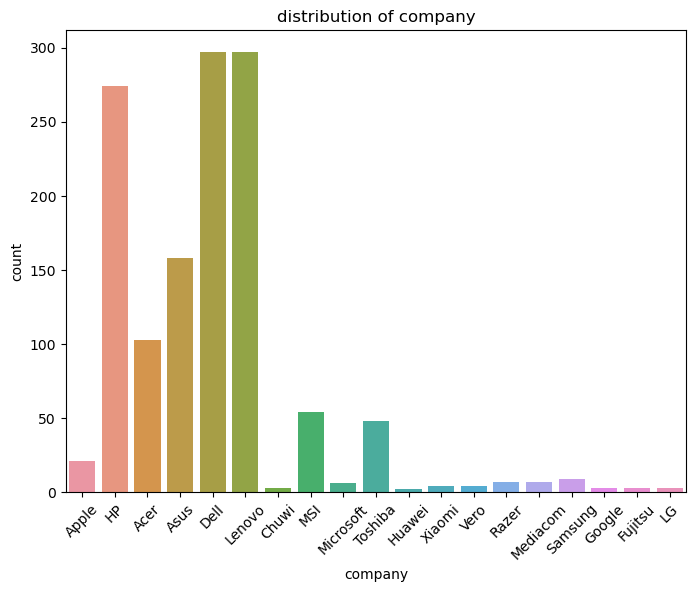

In [35]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='Company')
plt.title('distribution of company')
plt.xlabel('company')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

In [36]:
df.Product.value_counts()

Product
XPS 13                                     30
Inspiron 3567                              29
250 G6                                     21
Legion Y520-15IKBN                         19
Vostro 3568                                19
                                           ..
15-bw007nv (A10-9620P/6GB/128GB/Radeon      1
SmartBook 130                               1
A541NA-GO342 (N3350/4GB/500GB/Linux)        1
17-X047na (i3-6006U/8GB/1TB/W10)            1
V330-15IKB (i5-8250U/4GB/500GB/FHD/W10)     1
Name: count, Length: 618, dtype: int64

In [37]:
df.TypeName.value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

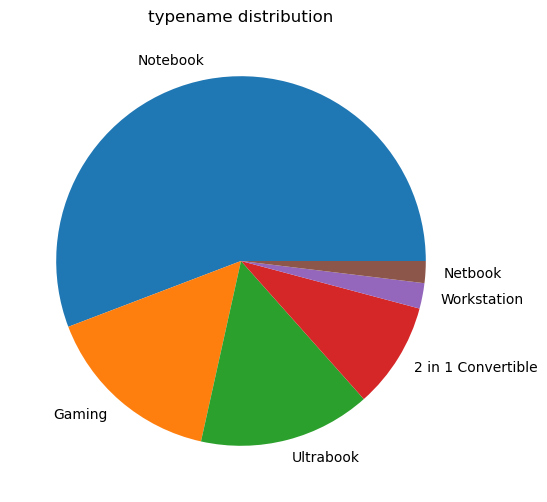

In [39]:
plt.figure(figsize=(6,6))
plt.pie(df['TypeName'].value_counts(),labels=df['TypeName'].value_counts().index)
plt.title("typename distribution")
plt.show()



In [40]:
df.Inches.value_counts()

Inches
15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: count, dtype: int64

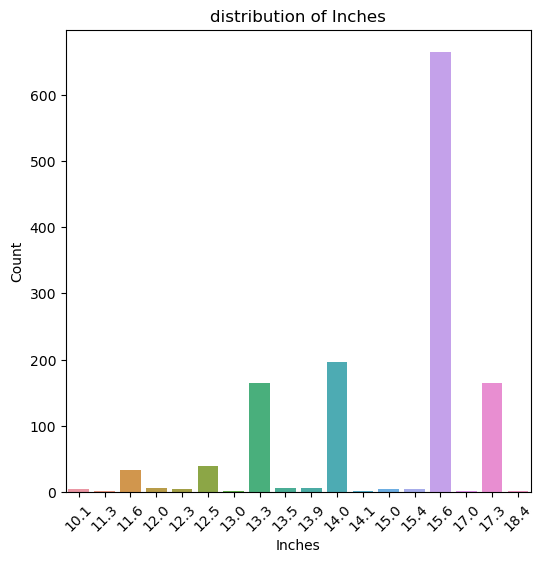

In [45]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='Inches')
plt.title('distribution of Inches')
plt.xlabel('Inches')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [46]:
df.ScreenResolution.value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

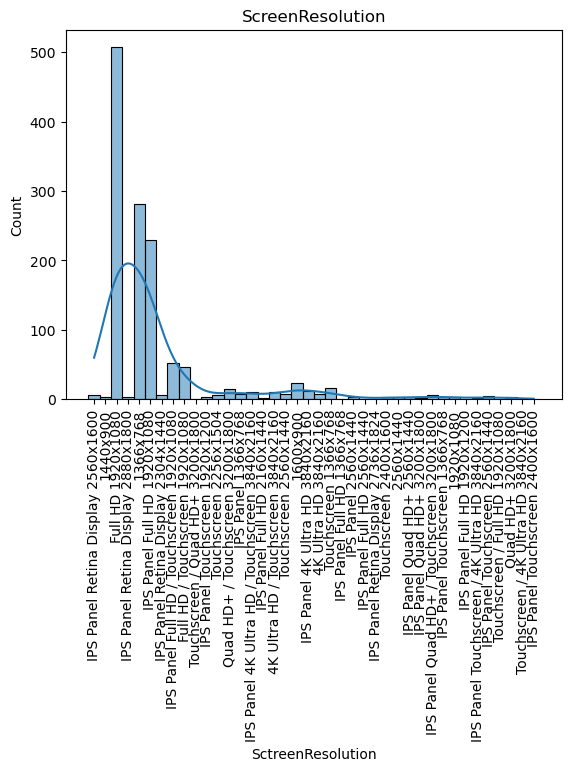

In [48]:
plt.Figure(figsize=(12,10))
sns.histplot(df['ScreenResolution'],kde=True)
plt.title('ScreenResolution')
plt.xlabel('SctreenResolution')
plt.xticks(rotation=90)
plt.show()

In [50]:
df.Cpu.value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [55]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [56]:
df.Ram.value_counts()

Ram
8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: count, dtype: int64

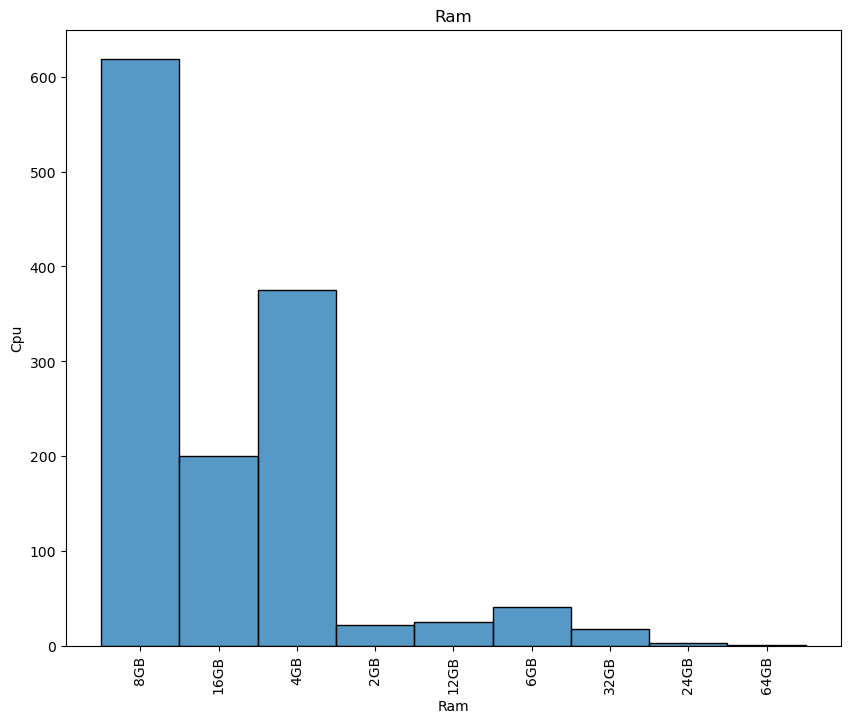

In [61]:
plt.figure(figsize=(10, 8))
sns.histplot(df['Ram'])
plt.title('Ram')
plt.xlabel('Ram')
plt.ylabel('Cpu')
plt.xticks(rotation=90)
plt.show()

In [62]:
df.Memory.value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

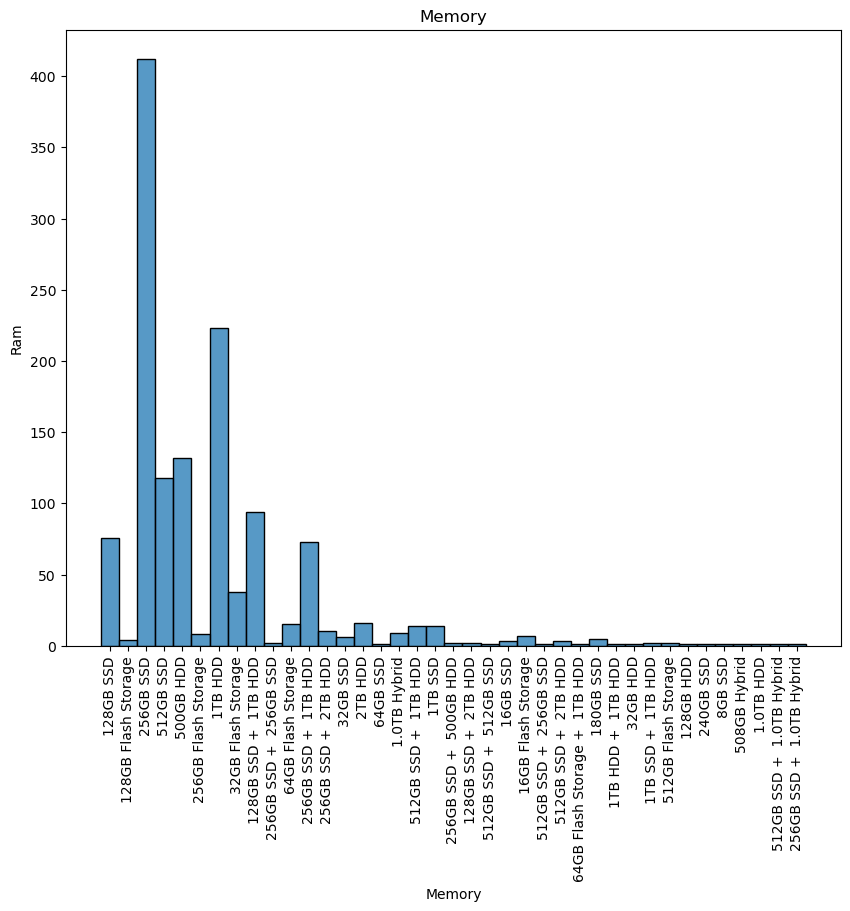

In [63]:
plt.figure(figsize=(10, 8))
sns.histplot(df['Memory'])
plt.title('Memory')
plt.xlabel('Memory')
plt.ylabel('Ram')
plt.xticks(rotation=90)
plt.show()

In [64]:
df.Gpu.value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [65]:
df.OpSys.value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

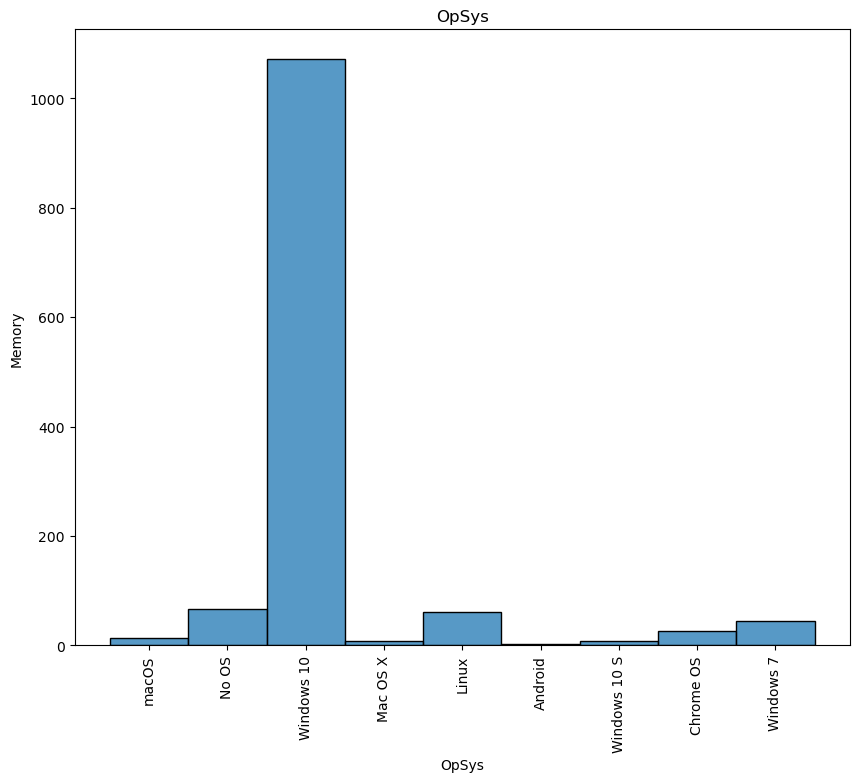

In [69]:
plt.figure(figsize=(10, 8))
sns.histplot(df['OpSys'])
plt.title('OpSys')
plt.xlabel('OpSys')
plt.ylabel('Memory')
plt.xticks(rotation=90)
plt.show()

In [70]:
pd.crosstab(df.Company,df.TypeName)

TypeName,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
Company,,,,,,
Acer,8,8,5,78,4,0
Apple,0,0,0,0,21,0
Asus,13,54,4,67,20,0
Chuwi,0,0,0,3,0,0
Dell,30,40,2,165,49,11
Fujitsu,0,0,0,3,0,0
Google,0,0,0,0,3,0
HP,19,12,9,184,36,14
Huawei,0,0,0,0,2,0


In [71]:
pd.crosstab(df.Company,df.Inches)

Inches,10.1,11.3,11.6,12.0,12.3,12.5,13.0,13.3,13.5,13.9,14.0,14.1,15.0,15.4,15.6,17.0,17.3,18.4
Company,,,,,,,,,,,,,,,,,,
Acer,0,0,9,0,0,0,0,6,0,0,13,0,0,0,66,0,9,0
Apple,0,0,1,6,0,0,0,10,0,0,0,0,0,4,0,0,0,0
Asus,0,0,6,0,0,3,0,13,0,0,19,1,0,0,74,0,42,0
Chuwi,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0
Dell,0,0,4,0,0,8,0,48,0,0,21,0,1,0,187,0,28,0
Fujitsu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0
Google,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0
HP,0,0,7,0,0,16,0,39,0,0,46,0,0,0,130,1,35,0
Huawei,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0


In [72]:
pd.crosstab(df.Company,df.ScreenResolution)

ScreenResolution,1366x768,1440x900,1600x900,1920x1080,2560x1440,4K Ultra HD / Touchscreen 3840x2160,4K Ultra HD 3840x2160,Full HD / Touchscreen 1920x1080,Full HD 1920x1080,IPS Panel 1366x768,...,IPS Panel Touchscreen 2560x1440,Quad HD+ / Touchscreen 3200x1800,Quad HD+ 3200x1800,Touchscreen / 4K Ultra HD 3840x2160,Touchscreen / Full HD 1920x1080,Touchscreen / Quad HD+ 3200x1800,Touchscreen 1366x768,Touchscreen 2256x1504,Touchscreen 2400x1600,Touchscreen 2560x1440
Company,,,,,,,,,,,,,,,,,,,,,
Acer,45,0,2,0,0,0,0,0,21,3,...,0,0,0,0,0,0,0,0,0,0
Apple,1,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Asus,38,0,1,1,0,1,0,7,75,0,...,0,0,1,0,1,0,3,0,0,0
Chuwi,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
Dell,65,0,1,0,1,6,5,24,130,0,...,0,12,1,0,0,1,5,0,0,1
Fujitsu,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Google,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
HP,64,0,6,1,1,1,0,6,126,1,...,0,3,1,0,0,0,6,0,0,2
Huawei,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
pd.crosstab(df.Company,df.OpSys)

OpSys,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
Company,,,,,,,,,
Acer,0,11,16,0,0,76,0,0,0
Apple,0,0,0,8,0,0,0,0,13
Asus,0,3,10,0,4,139,2,0,0
Chuwi,0,0,0,0,0,3,0,0,0
Dell,0,1,36,0,0,253,0,7,0
Fujitsu,0,0,0,0,0,3,0,0,0
Google,0,3,0,0,0,0,0,0,0
HP,0,4,0,0,12,235,0,23,0
Huawei,0,0,0,0,0,2,0,0,0


In [74]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

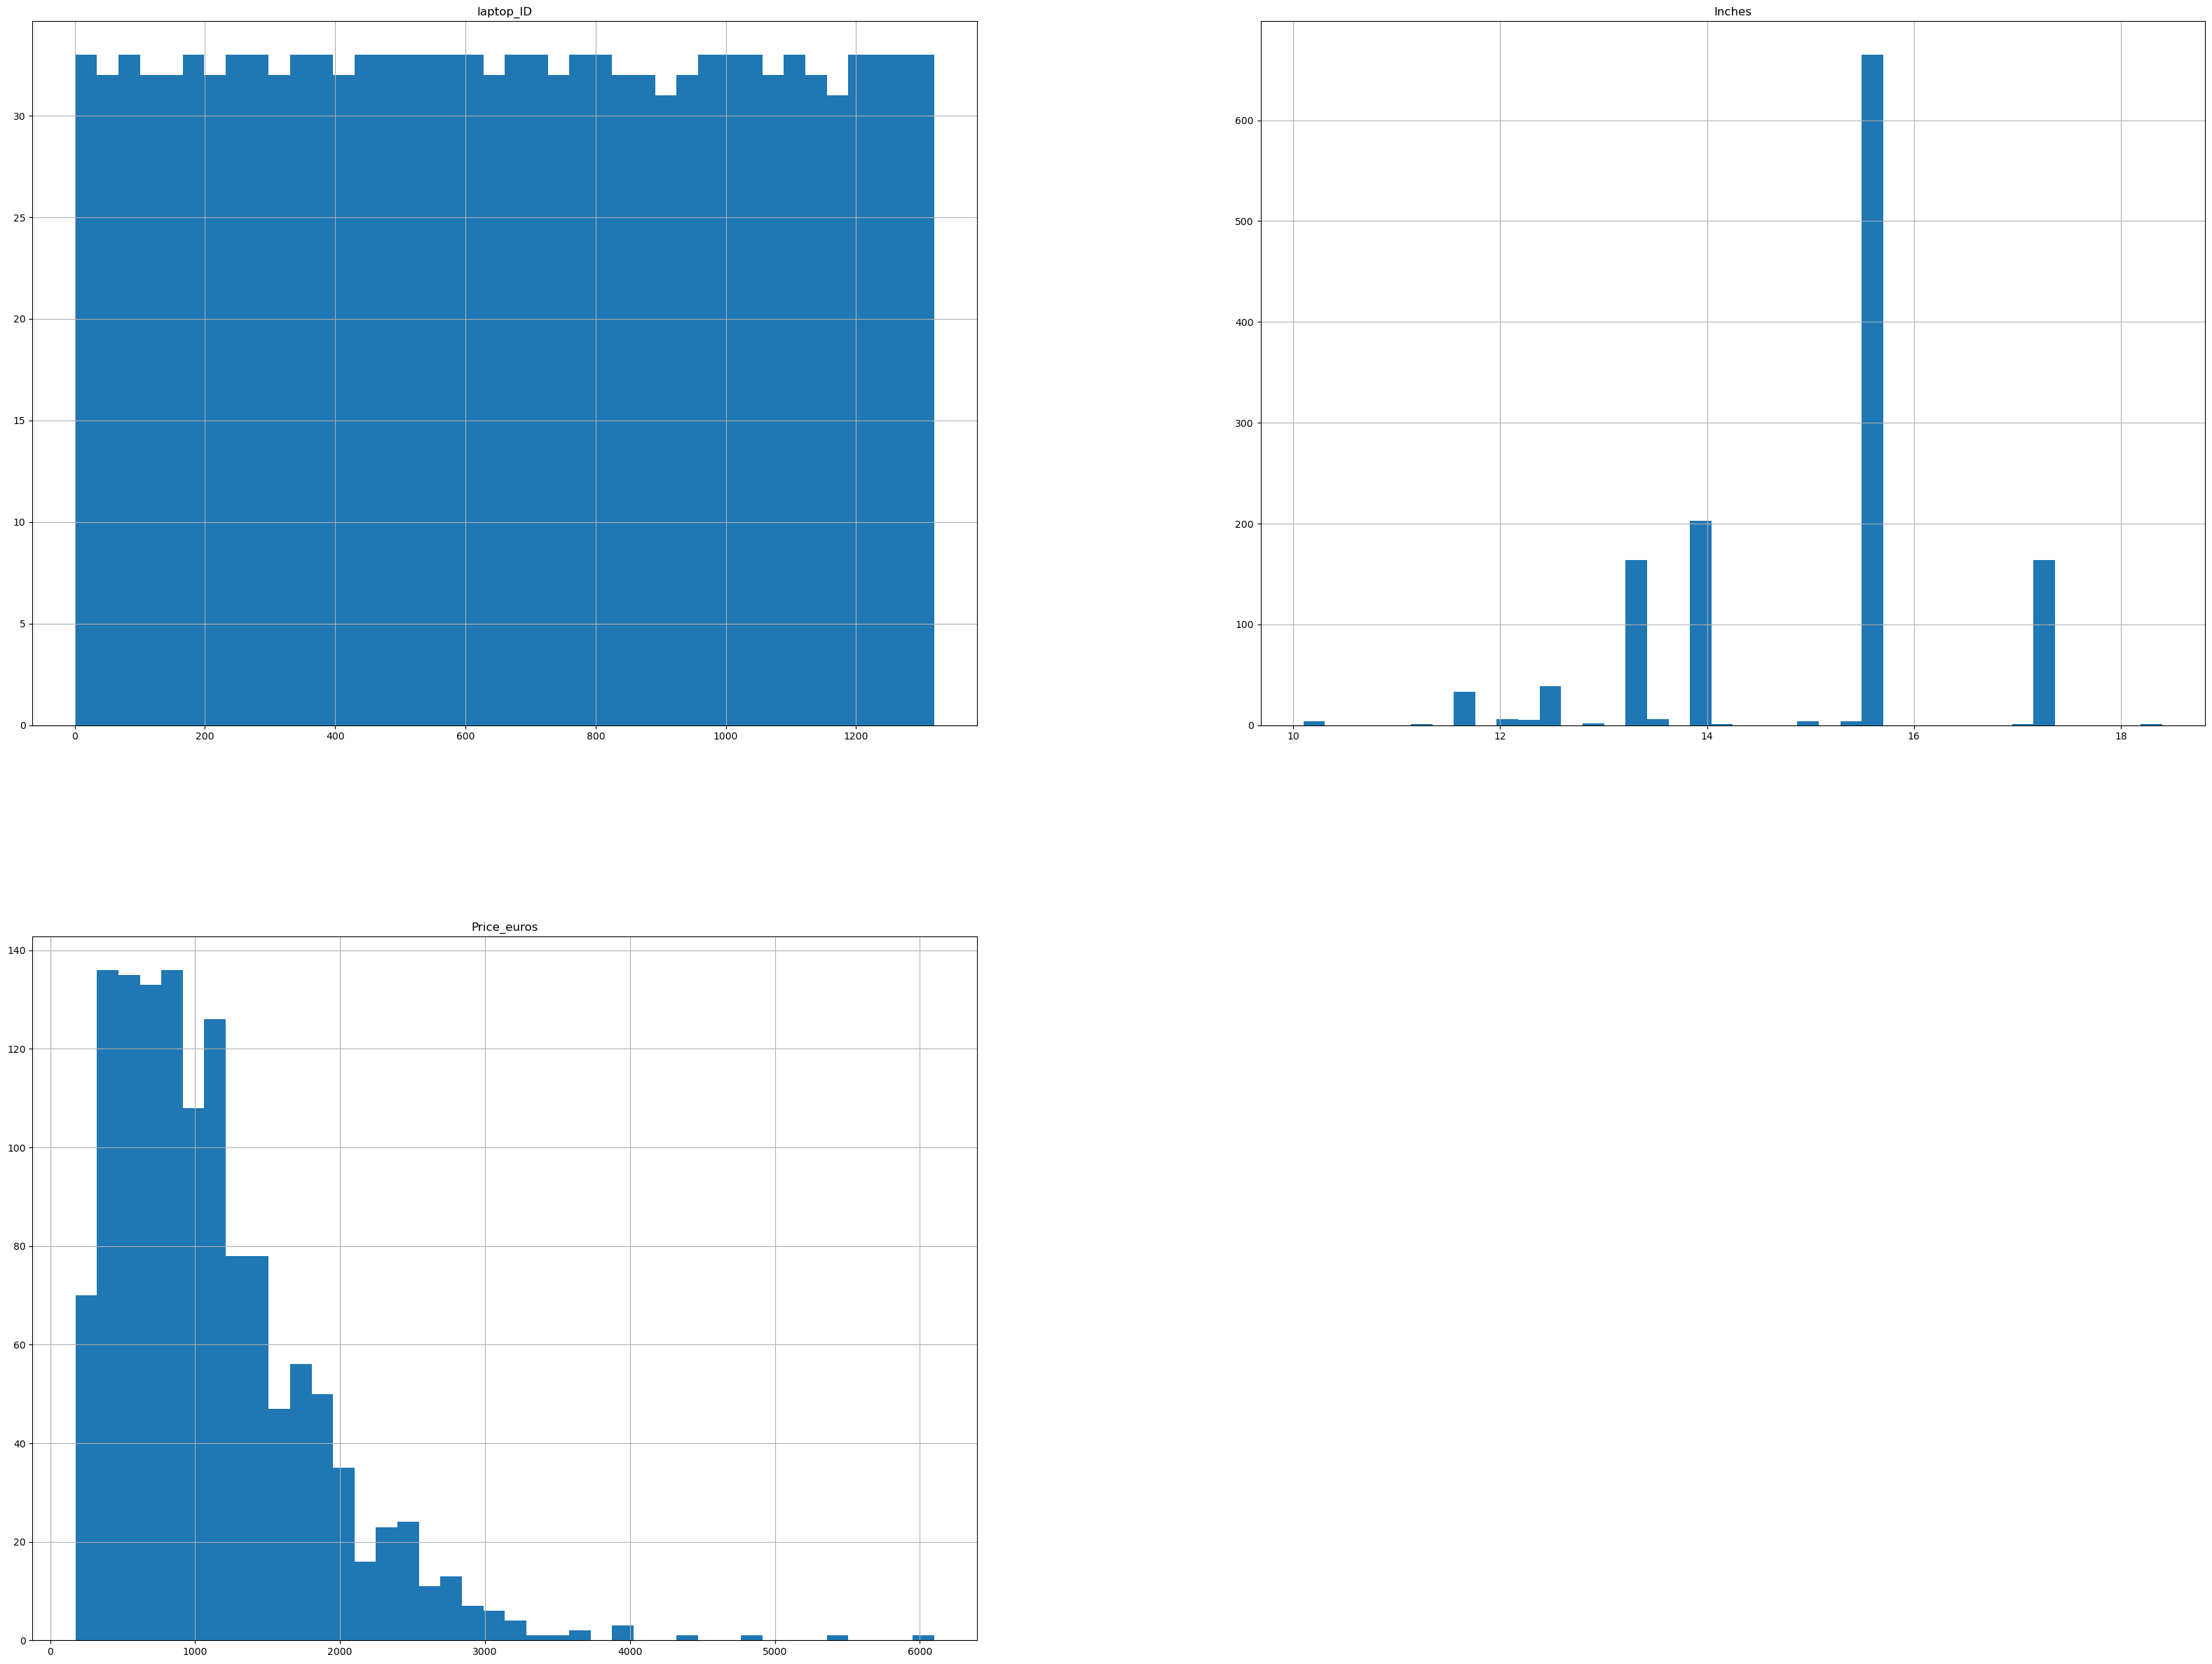

In [76]:
df.hist(bins=40 ,figsize=(40,30))
plt.show()

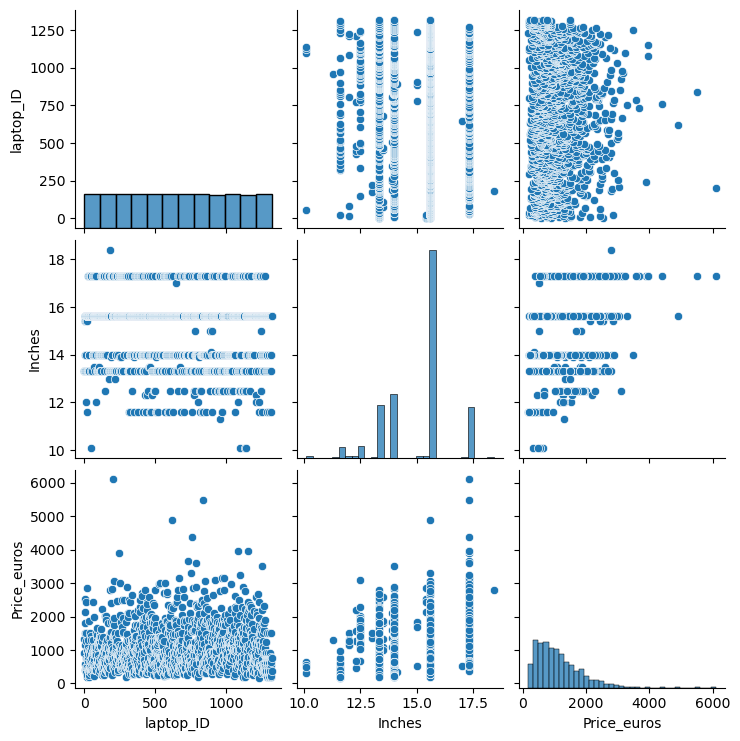

In [77]:
sns.pairplot(df)

Value counts for column: laptop_ID
Value counts for column: Company


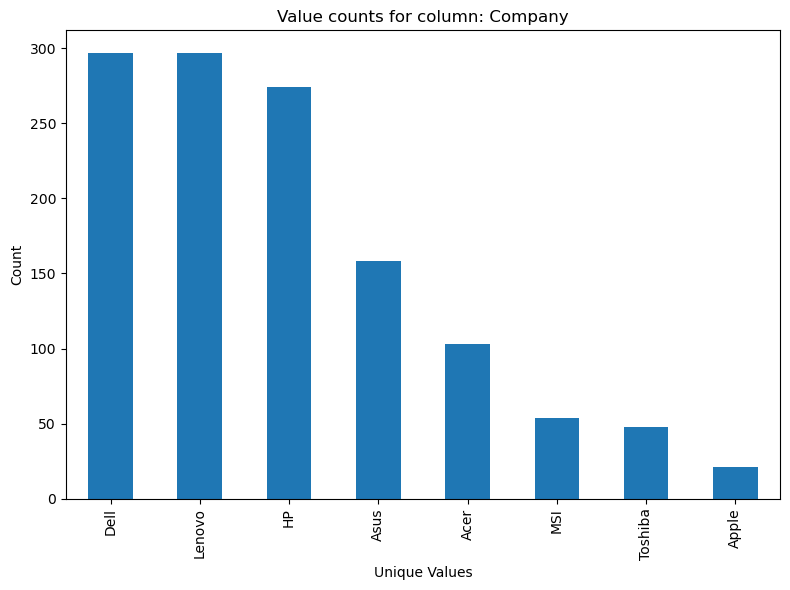

Value counts for column: Product


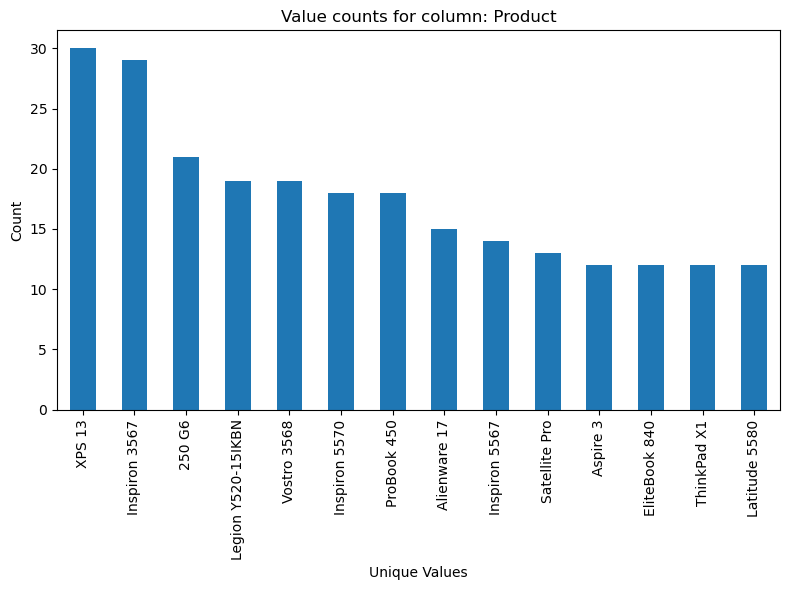

Value counts for column: TypeName


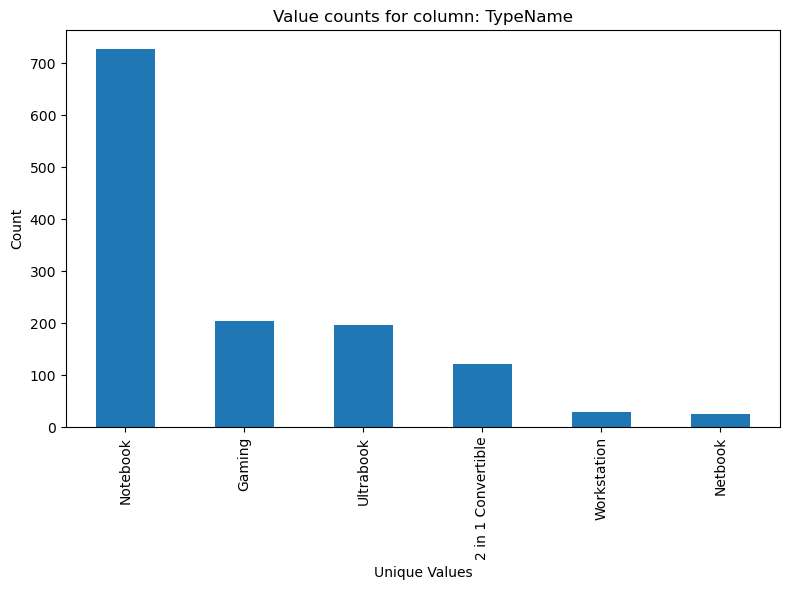

Value counts for column: Inches


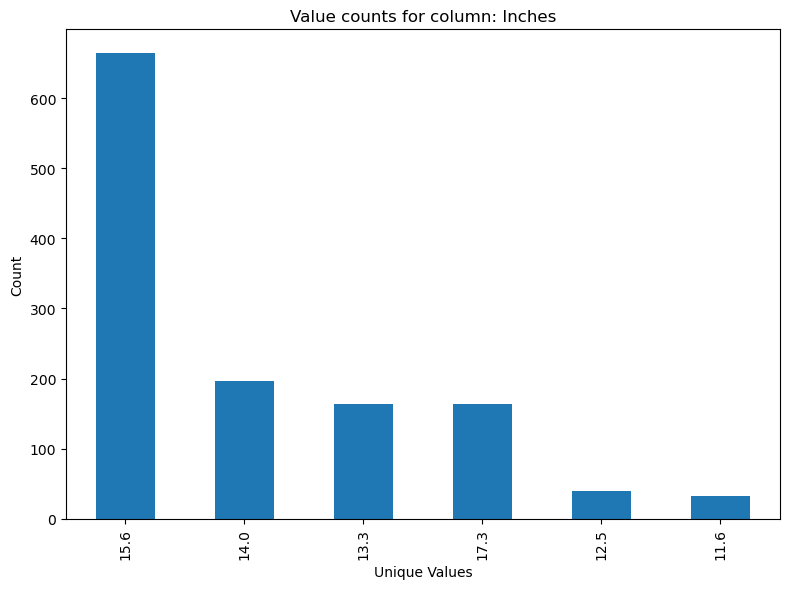

Value counts for column: ScreenResolution


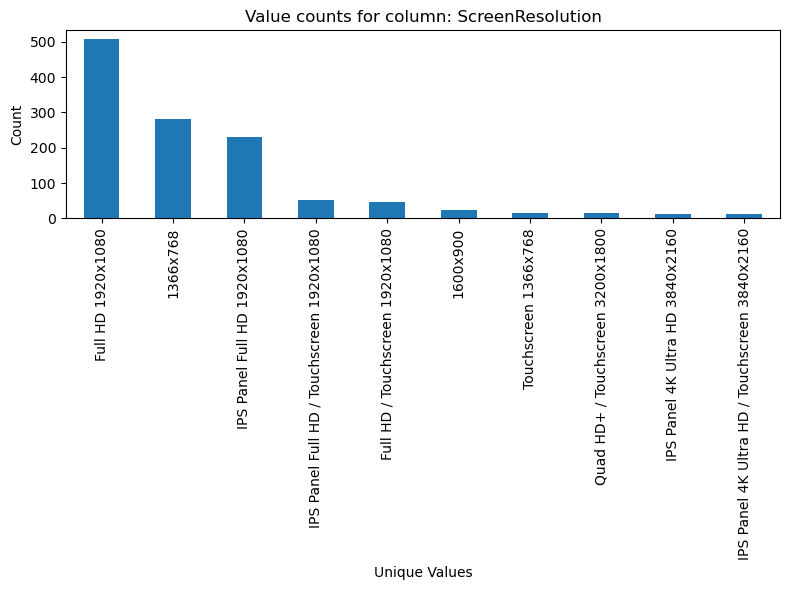

Value counts for column: Cpu


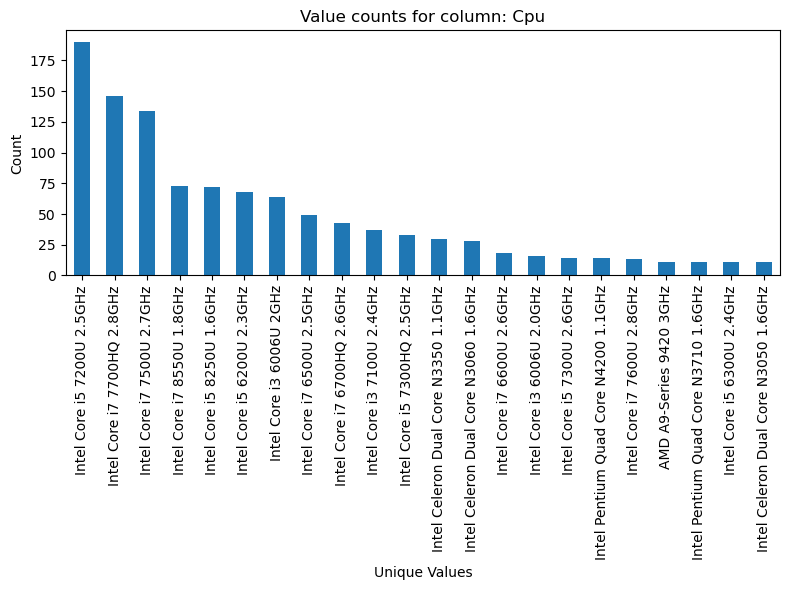

Value counts for column: Ram


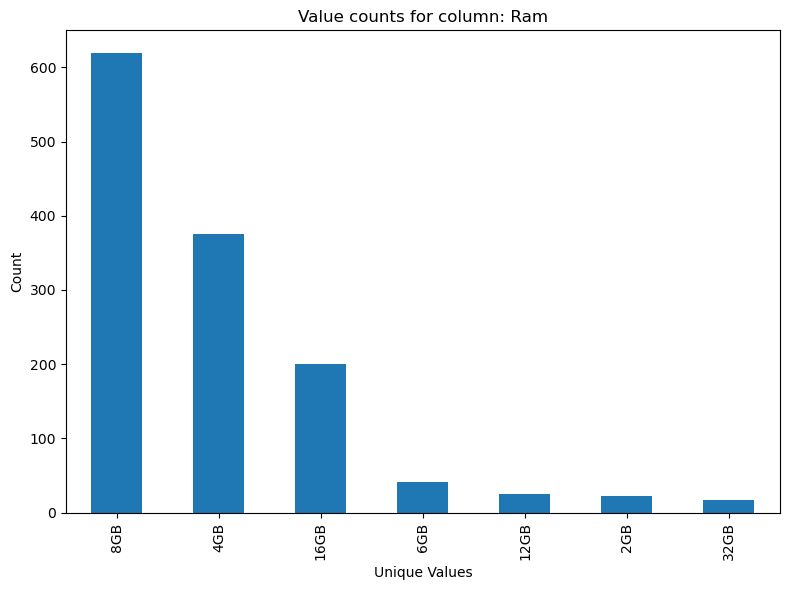

Value counts for column: Memory


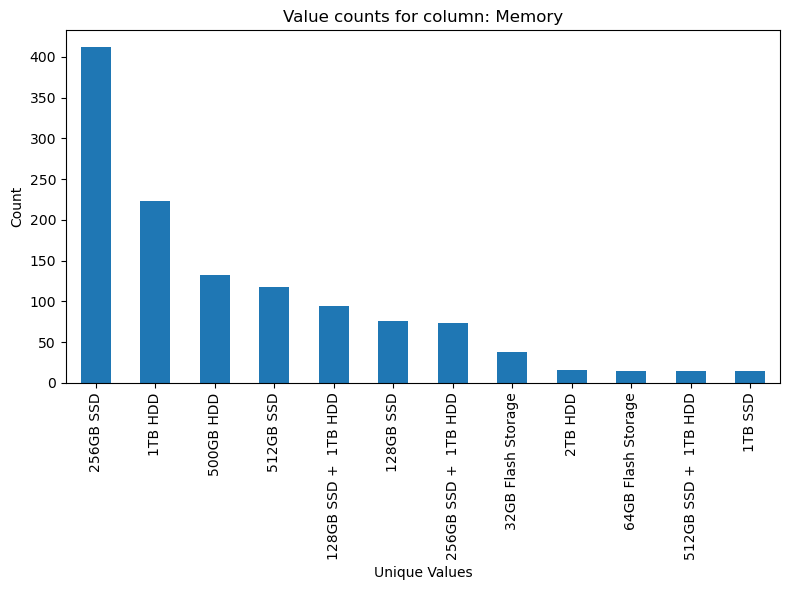

Value counts for column: Gpu


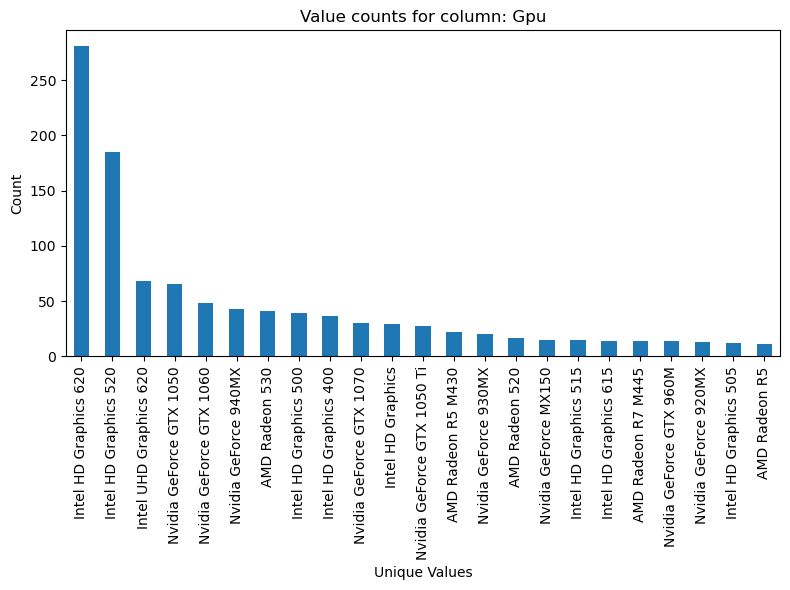

Value counts for column: OpSys


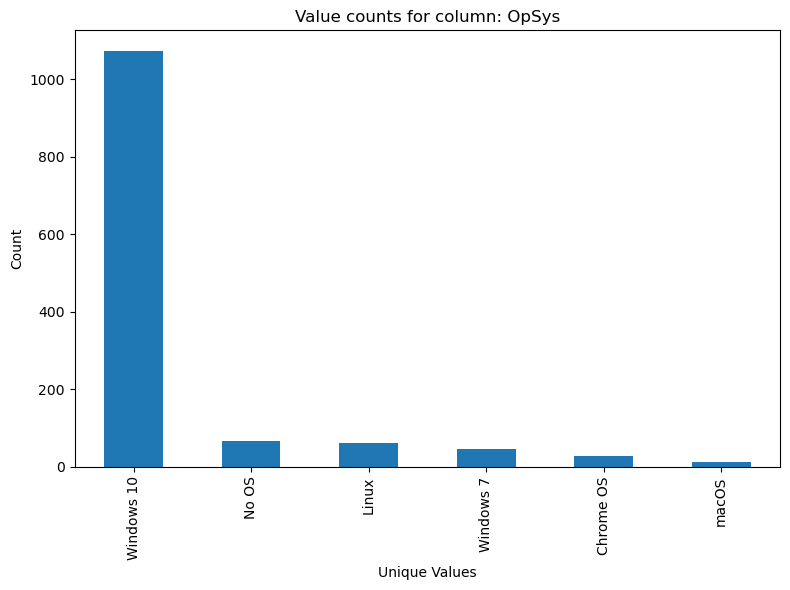

Value counts for column: Weight


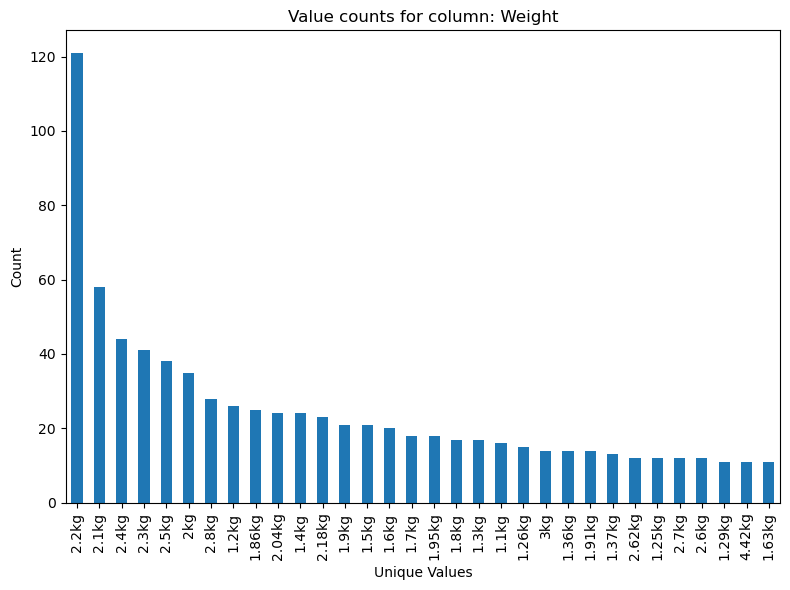

Value counts for column: Price_euros


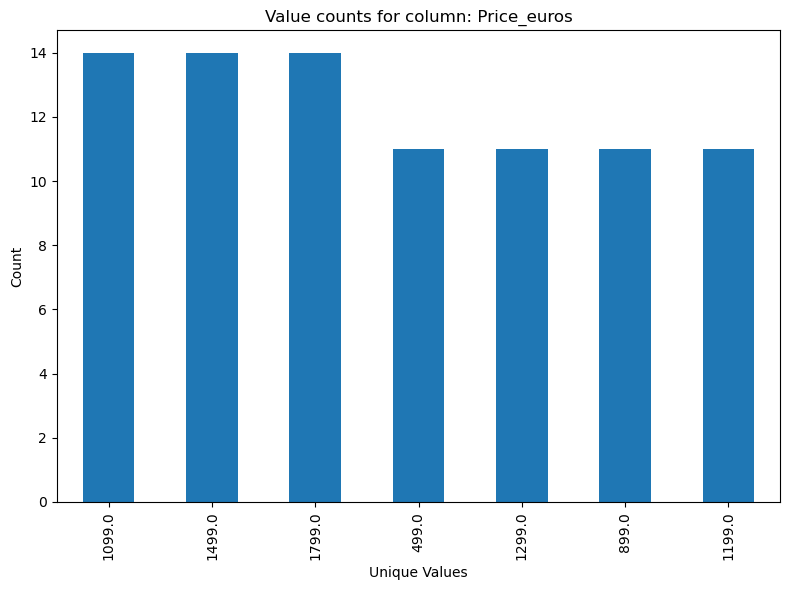

In [78]:
for col in df.columns:
    print(f'Value counts for column: {col}')
    value_counts = df[col].value_counts()
    common_values = value_counts[value_counts > 10].index
    filtered_df = df[df[col].isin(common_values)]
    if not filtered_df.empty:
        filtered_value_counts = filtered_df[col].value_counts()
        plt.figure(figsize=(8, 6))  
        filtered_value_counts.plot(kind='bar')
        plt.title(f'Value counts for column: {col}')
        plt.xlabel('Unique Values')
        plt.ylabel('Count')
        plt.xticks(rotation=90)  
        plt.tight_layout()  
        plt.show()

In [81]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64